In [1]:
import os
import numpy as np
import yaml
import random
import shutil
import re
import os
import math

os.chdir("..")

In [2]:
def convert_11_to_xywh(bbox):
    # Extract coordinates from the given bounding box format
    x1, y1 = bbox[1], bbox[2]
    x2, y2 = bbox[3], bbox[4]
    x3, y3 = bbox[5], bbox[6]
    x4, y4 = bbox[7], bbox[8]

    # Calculate the center coordinates (x_center, y_center)
    x_center = (x1 + x2 + x3 + x4) / 4
    y_center = (y1 + y2 + y3 + y4) / 4

    # Calculate the width and height
    width = (max(x1, x2, x3, x4) - min(x1, x2, x3, x4))
    height = (max(y1, y2, y3, y4) - min(y1, y2, y3, y4))

    # Return the bounding box in xywh format (relative values)
    return [x_center, y_center, width, height]

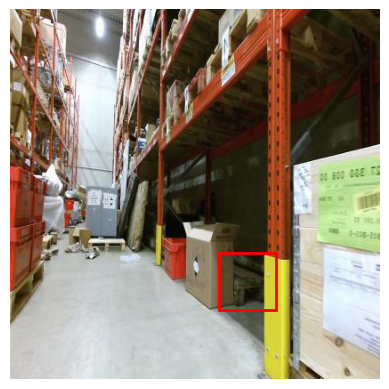

In [4]:
# Plot image with bounding box in xywh format
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Step 1: Load the image
image_path = r'C:\Users\chena\Desktop\EZLift\model_training\datasets\loco\train\images\253874-2346_jpg.rf.ae352f5ab98e48c773e4802bc1c72d74.jpg'# image_path = r'C:\Users\chena\Desktop\EZLift\model_training\datasets\combined_dataset\train\images\94f6661e-242Boooo_jpg.rf.970345390fe41cb78bc5d254f5d91bee.jpg'

image = cv2.imread(image_path)
if image is None:
    raise FileNotFoundError(f"Image not found at {image_path}")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert BGR to RGB for matplotlib

# Step 2: Define the bounding box in normalized xywh format (relative values)
x_rel, y_rel, w_rel, h_rel =  convert_11_to_xywh([1, 0.7172395841346154, 0.8115740745192308, 0.7172395841346154, 0.65759259375, 0.5639583341346154, 0.65759259375, 0.5639583341346154, 0.8115740745192308, 0.7172395841346154, 0.8115740745192308])
# Step 3: Get image dimensions
image_height, image_width, _ = image.shape

# Step 4: Convert relative xywh to absolute x1y1 (top-left corner) in pixels
x_center = x_rel * image_width
y_center = y_rel * image_height
width = w_rel * image_width
height = h_rel * image_height
x1 = x_center - width / 2
y1 = y_center - height / 2

# Step 5: Plot the image and bounding box
fig, ax = plt.subplots()
ax.imshow(image)

# Add the bounding box (as a red rectangle)
rect = patches.Rectangle(
    (x1, y1), width, height, linewidth=2, edgecolor='r', facecolor='none'
)
ax.add_patch(rect)

# Display the image with the bounding box
plt.axis('off')  # Optional: Remove axis ticks
plt.show()

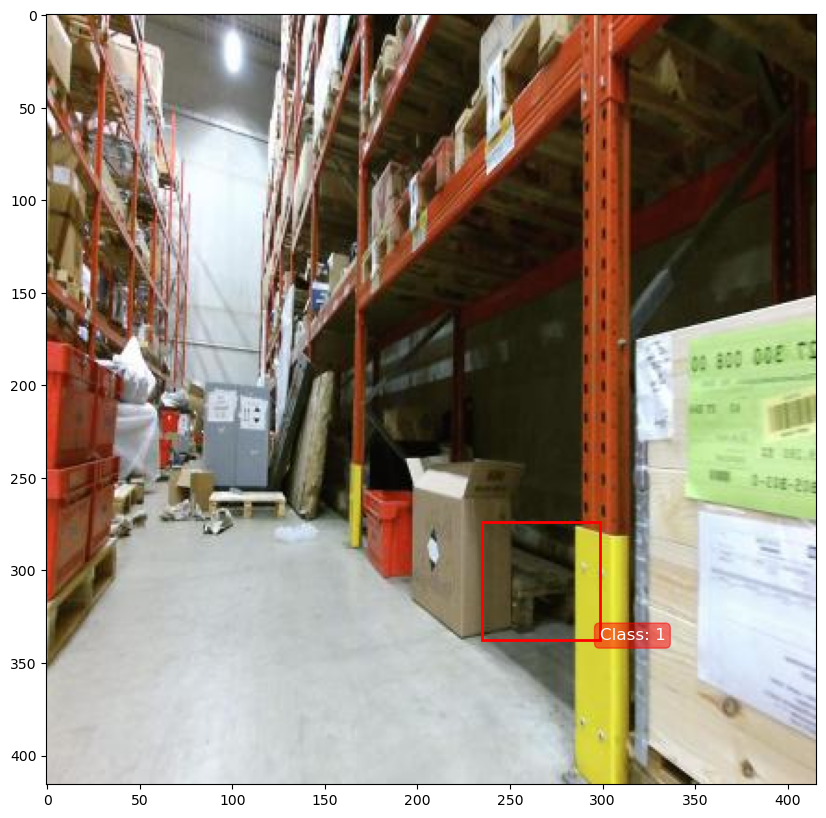

In [6]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Function to plot image and bounding box with relative coordinates
def plot_image_with_bbox(image_path, bbox):
    # Read the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Get image dimensions (height, width)
    height, width, _ = img.shape
    
    # Plotting the image
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img_rgb)

    # Bounding box format: [class, x1, y1, x2, y2, x3, y3, x4, y4, x1, x2]
    # Extract relative coordinates
    class_id = bbox[0]
    x1, y1 = bbox[1] * width, bbox[2] * height
    x2, y2 = bbox[3] * width, bbox[4] * height
    x3, y3 = bbox[5] * width, bbox[6] * height
    x4, y4 = bbox[7] * width, bbox[8] * height
    
    # Create a polygon patch for the bounding box
    polygon = patches.Polygon(
        [(x1, y1), (x2, y2), (x3, y3), (x4, y4)],
        linewidth=2, edgecolor='r', facecolor='none'
    )
    
    ax.add_patch(polygon)

    # Annotating class on the image
    ax.text(x1, y1, f'Class: {class_id}', color='white', fontsize=12, 
            bbox=dict(facecolor='red', alpha=0.5, edgecolor='red', boxstyle='round,pad=0.3'))

    plt.show()

# Example usage with relative coordinates
bbox = [1, 0.7172395841346154, 0.8115740745192308, 0.7172395841346154, 0.65759259375, 0.5639583341346154, 0.65759259375, 0.5639583341346154, 0.8115740745192308, 0.7172395841346154, 0.8115740745192308]
image_path = r'C:\Users\chena\Desktop\EZLift\model_training\datasets\loco\train\images\253874-2346_jpg.rf.ae352f5ab98e48c773e4802bc1c72d74.jpg'# image_path = r'C:\Users\chena\Desktop\EZLift\model_training\datasets\combined_dataset\train\images\94f6661e-242Boooo_jpg.rf.970345390fe41cb78bc5d254f5d91bee.jpg'
plot_image_with_bbox(image_path, bbox)

11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11
11


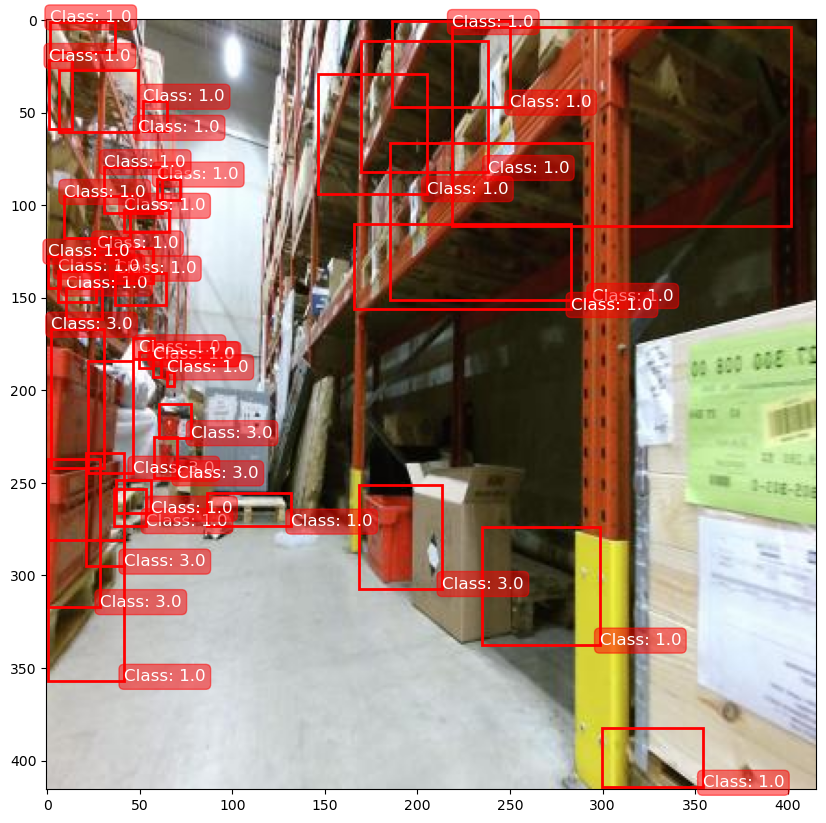

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import cv2

# Function to plot image and bounding box with relative coordinates from a txt file
def plot_image_with_bbox_from_txt(image_path, txt_file_path):
    # Read the image
    img = cv2.imread(image_path)
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # Convert to RGB for displaying in matplotlib
    
    # Get image dimensions (height, width)
    height, width, _ = img.shape
    
    # Read bounding box data from the txt file
    with open(txt_file_path, 'r') as f:
        bboxes = f.readlines()
    
    # Plotting the image
    fig, ax = plt.subplots(1, figsize=(10, 10))
    ax.imshow(img_rgb)
    
    # Iterate through each bounding box in the file
    for bbox_line in bboxes:
        print(len(bbox_line.split()))
        bbox = list(map(float, bbox_line.split()))
        
        # Bounding box format: [class, x1, y1, x2, y2, x3, y3, x4, y4, x1, x2]
        # Extract relative coordinates
        class_id = bbox[0]
        x1, y1 = bbox[1] * width, bbox[2] * height
        x2, y2 = bbox[3] * width, bbox[4] * height
        x3, y3 = bbox[5] * width, bbox[6] * height
        x4, y4 = bbox[7] * width, bbox[8] * height
        
        # Create a polygon patch for the bounding box
        polygon = patches.Polygon(
            [(x1, y1), (x2, y2), (x3, y3), (x4, y4)],
            linewidth=2, edgecolor='r', facecolor='none'
        )
        
        ax.add_patch(polygon)

        # Annotating class on the image
        ax.text(x1, y1, f'Class: {class_id}', color='white', fontsize=12, 
                bbox=dict(facecolor='red', alpha=0.5, edgecolor='red', boxstyle='round,pad=0.3'))
    
    plt.show()

# Example usage with the path to the text file containing bounding box values
image_path = r'C:\Users\chena\Desktop\EZLift\model_training\datasets\loco\train\images\253874-2346_jpg.rf.ae352f5ab98e48c773e4802bc1c72d74.jpg'
txt_file_path = r'C:\Users\chena\Desktop\EZLift\model_training\datasets\loco\train\labels\253874-2346_jpg.rf.ae352f5ab98e48c773e4802bc1c72d74.txt'
plot_image_with_bbox_from_txt(image_path, txt_file_path)